In [1]:
from cdf import vlos_epoch_from_cdf
from plot import *
import numpy as np

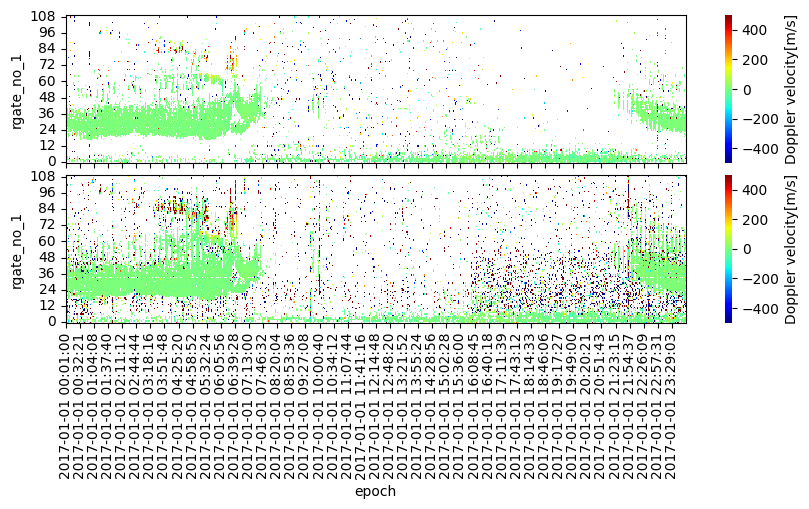

In [2]:
data, timestamp = vlos_epoch_from_cdf('data/fitacf/hok/2017/sd_fitacf_l2_hok_20170101_v01.cdf')
noisy_data, _ = vlos_epoch_from_cdf('data/fitacf_local/hok/2017/sd_fitacf_l2_hok_20170101_v02.cdf')
list_data = [data.values, noisy_data.values]

plot_list_data(list_data, timestamp)

In [5]:
data

<xarray.DataArray 'vlos_1' (rgate_no_1: 110, Epoch_1: 22125)>
array([[ 1.0000000e+04,  1.0000000e+04,  1.0000000e+04, ...,
        -3.8822475e+01,  4.7135765e+01, -2.1800371e+01],
       [ 1.0000000e+04,  1.0000000e+04,  1.0000000e+04, ...,
        -5.2642856e+00,  3.7985401e+01, -2.7096395e+01],
       [-4.4145222e+01,  1.0000000e+04,  1.0000000e+04, ...,
        -9.6816397e+00,  1.0000000e+04, -7.4872368e+01],
       ...,
       [ 1.0000000e+04,  1.0000000e+04,  1.0000000e+04, ...,
         1.0000000e+04,  1.0000000e+04,  1.0000000e+04],
       [ 1.0000000e+04,  1.0000000e+04,  1.0000000e+04, ...,
         1.0000000e+04,  1.0000000e+04,  1.0000000e+04],
       [ 1.0000000e+04,  1.0000000e+04,  1.0000000e+04, ...,
         1.0000000e+04,  1.0000000e+04,  1.0000000e+04]], dtype=float32)
Coordinates:
  * rgate_no_1  (rgate_no_1) int16 0 1 2 3 4 5 6 ... 103 104 105 106 107 108 109
  * Epoch_1     (Epoch_1) float64 6.365e+13 6.365e+13 ... 6.365e+13 6.365e+13
Attributes: (12/20)
    FIELDNAM:       Doppler velocity 1
    CATDESC:        spectral width for 110 range gate measurement
    VALIDMIN:       -1E+31
    VALIDMAX:       1E+31
    SCALEMIN:       -1E+31
    SCALEMAX:       1E+31
    ...             ...
    AVG_TYPE:       standard
    DISPLAY_TYPE:   spectrogram
    SCALETYP:       linear
    standard_name:  Doppler velocity 1
    units:          m/s
    long_name:      Doppler velocity 1

In [3]:
masked_data = np.ma.masked_where(data==1.0000000e+04, data)
# masked_data=data.copy()
# masked_data.values[(data==1.0000000e+04).values] = '--'

In [4]:
std_data = masked_data - masked_data.mean(axis=0)

In [5]:
from sklearn.decomposition import FastICA

n_components=2
ica = FastICA(n_components=n_components)
# run ICA on image
ica.fit(masked_data)
# reconstruct image with independent components
data_ica = ica.fit_transform(masked_data)
data_restored = ica.inverse_transform(data_ica)
A_ = ica.mixing_


/home/mmiyazaki/Documents_ubuntu/noise_cancel/noise_cancel_env/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/mmiyazaki/Documents_ubuntu/noise_cancel/noise_cancel_env/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [6]:
# data_restored = np.dot(data_ica[:,2:3],A_[:,2:3].T)+ica.mean_

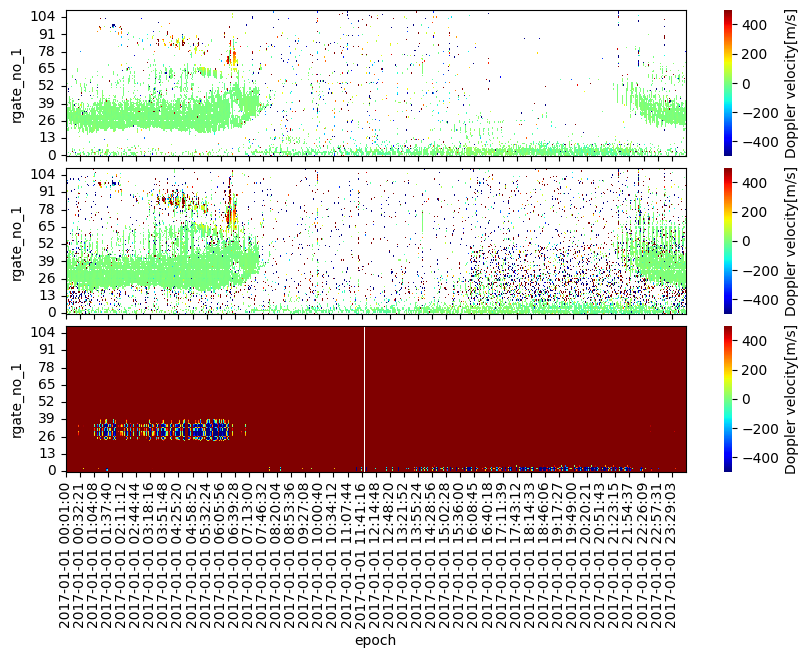

In [7]:
list_data = [data, noisy_data, data_restored]
plot_list_data(list_data, timestamp)

In [8]:
ica_list_data = []
for idx in range(n_components):
    ica_list_data.append(np.dot(data_ica[:,idx:idx+1],A_[:,idx:idx+1].T)+ica.mean_)
plot_list_data(ica_list_data, timestamp, mask=1.0000000e+04)

TypeError: plot_list_data() got an unexpected keyword argument 'mask'

In [ ]:
import glob

In [ ]:
data_path = sorted(glob.glob('data/fitacf_local/hok/2017/*'))

In [ ]:
# for path in data_path:
#     data, timestamp = vlos_epoch_from_cdf(path)
#     plot_data(data, timestamp)

In [ ]:
from source.skica import ICA
from source.cdf import vlos_epoch_from_cdf
from source.plot import *
import numpy as np

In [ ]:
list_data = []
list_masked_data = []
for path in data_path[:10]:
    temp_data = vlos_epoch_from_cdf(path)[0]
    masked_data = np.ma.masked_where(temp_data==1.0000000e+04, temp_data)
    list_data.append(temp_data.values)
    list_masked_data.append(masked_data)
timestamp = vlos_epoch_from_cdf(data_path[0])[1]

In [ ]:
list_data

In [ ]:
list_masked_data

In [ ]:
ica = ICA()
ica.read_sources(list_data)
ica.run()
# ica.plot()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 255))
S_ = []
for i in range(ica.npics):
    s = ica.S_[:,i]
    s = scaler.fit_transform(s.reshape( (-1, 1) ) )
    s = np.reshape(s, ica.pic_size)
    S_.append(s)

In [ ]:
masked_ica = ICA()
masked_ica.read_sources(list_masked_data)
masked_ica.run()
# ica.plot()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 255))
masked_S_ = []
for i in range(masked_ica.npics):
    s = masked_ica.S_[:,i]
    s = scaler.fit_transform(s.reshape( (-1, 1) ) )
    s = np.reshape(s, masked_ica.pic_size)
    masked_S_.append(s)

In [ ]:
plot_list_data(S_, timestamp)

In [ ]:
plot_list_data(masked_S_, timestamp)